12/12/2024 - Alex finds a $z$-dependence on the $y$-intercept for each of the calibration clusters, after removing their Hubble flow.  Do we see the same thing?

In [2]:
import numpy as np

from astropy.io import fits
from astropy.table import Table

import pickle

import matplotlib.pyplot as plt

# Read in our best fit for the TFR

In [3]:
temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_KAD-20241211.pickle', 'rb')
cov_ab, tfr_samples, V0 = pickle.load(temp_infile)
temp_infile.close()

In [23]:
b = np.median(tfr_samples[2:-1,:], axis=1)
b_err = np.sqrt(np.diag(cov_ab[2:-1,2:-1]))

# Read in cluster catalog

In [17]:
clusters = Table.read('../Tully15-Table3.fits')
clusters[:5]

f_Nest,Nest,Nmb,PGC1,SGLON,SGLAT,logLK,<Vcmba>,DM,sigV,R2t,sigP,Mlum,CF
,,,,deg,deg,[Lsun],km / s,mag,km / s,Mpc,km / s,Msun,
int16,int32,int16,int32,float64,float64,float64,int32,float64,int16,float64,int16,float64,float64
1,100001,136,44715,89.6226,8.1461,13.15,7331,34.33,886,2.129,1045,1.710e+15,1.65
1,100002,197,41220,103.0008,-2.3248,12.69,1491,30.87,670,1.440,707,5.290e+14,1.00
1,100003,113,43296,156.2336,-11.5868,12.75,3873,32.94,822,1.520,746,6.230e+14,1.12
1,100004,81,58265,71.5103,49.7851,13.16,9424,34.87,740,2.153,1057,1.770e+15,2.26
1,100005,61,36487,92.0255,-10.4950,12.78,6987,34.22,707,1.560,766,6.730e+14,1.58


In [19]:
# List of clusters used in the calibration
cluster_ids = np.asarray([100067, 100077, 101400, 101434, 101823, 103172, 103182, 103229])

idx = np.in1d(clusters['Nest'], cluster_ids)
cluster_mu = clusters['DM'][idx]

# Plot $\mu$ v. $b$

We should see a correlation, where clusters that are further away have fainter $y$-intercepts.

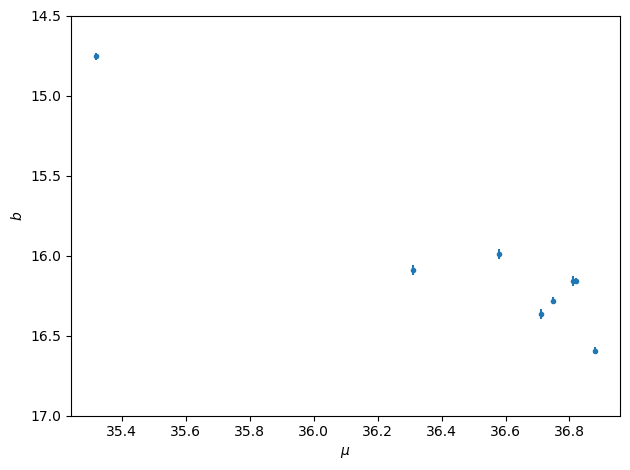

In [27]:
plt.figure(tight_layout=True)

plt.errorbar(cluster_mu, b, yerr=b_err, fmt='.')

plt.ylim([17, 14.5])

plt.xlabel('$\mu$')
plt.ylabel('$b$');

This is what we expect - clusters that are further away should have fainter $y$-intercepts.

# Compute $b_0$, the expected $y$-intercept based on the distance to the cluster

I'm going to compute $b_0$ to be the apparent magnitude of a galaxy with $M_r = -18$ within that cluster (looks like this is similar to what Alex is doing).

In [41]:
Mr_lim = -18
# Mr_lim = -20.5

b0 = Mr_lim + cluster_mu

# Plot $\mu$ v. $b - b_0$

We should NOT see a correlation.

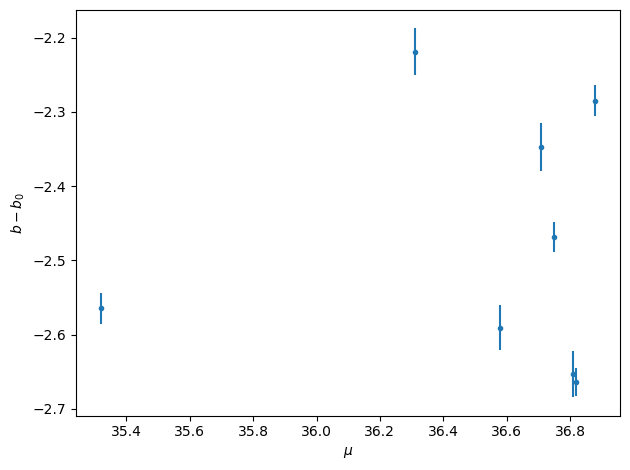

In [42]:
plt.figure(tight_layout=True)

plt.errorbar(cluster_mu, b - b0, yerr=b_err, fmt='.')

# plt.ylim([17, 14.5])

plt.xlabel('$\mu$')
plt.ylabel('$b - b_0$');